# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

# Read the data

Let's look at our data.

In [3]:
boston_df = pd.read_csv("boston airbnb data/listings.csv")

In [4]:
boston_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
boston_df.shape

(3585, 95)

In [6]:
boston_df.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
                                ... 
state                              0
neighbourhood_cleansed             0
street                             0
host_identity_verified             0
id                                 0
Length: 95, dtype: int64

So our dataset has total 3585 samples and 95 features. There are quite a few features. Some of the features have all NULL values.

# Questions

**Question 1** : How much does location of a listing contribute to it's popularity?

There might be several factors related to locations that make certain listings popular over others :
1. street, city, state of listing
2. transportation
3. neighbourhood
4. location of the host

First we will select the columns related to location informations only and then look at them one by one.

### Cleaning the data

In [7]:
boston_location_df = boston_df[['transit', 'host_location', 'host_neighbourhood', 'street',
                                'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
                                'neighbourhood_group_cleansed', 'city', 'state', 'smart_location',
                                'latitude', 'longitude', 'is_location_exact', 'review_scores_location']]

First check how many of these columns have **NULL** values.

In [8]:
boston_location_df.isnull().sum().sort_values()

street                               0
neighbourhood_cleansed               0
calculated_host_listings_count       0
state                                0
smart_location                       0
latitude                             0
longitude                            0
is_location_exact                    0
city                                 2
host_location                       11
zipcode                             38
host_neighbourhood                 339
neighbourhood                      543
review_scores_location             822
transit                           1290
neighbourhood_group_cleansed      3585
dtype: int64

The **'neighbourhood_group_cleansed'** column has all NULL values. Let's drop it.

In [9]:
boston_location_df.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let's start with the neighbourhood columns.

In [10]:
boston_location_df['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [11]:
boston_location_df['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Leather District        8
Brookline               8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

They look quite similar. To get a clearer idea, let's compare elementwise.

In [12]:
boston_location_df['neighbourhood_cleansed'].eq(boston_location_df['neighbourhood']).value_counts()

True     2123
False    1462
dtype: int64

So the two columns have 2123 values in common. But there are also 1462 entries which donot agree. 
Let's try to understand possible sources of dissimilarity.

The 'neighborhood' column has total 543 NULL values whereas 'neighbourhood_cleansed' has no NULL value. This is one source of dissimilarity.

In [13]:
boston_location_df['neighbourhood_cleansed'].eq(boston_location_df['neighbourhood'])

0        True
1        True
2        True
3       False
4        True
        ...  
3580    False
3581    False
3582    False
3583    False
3584    False
Length: 3585, dtype: bool

In [14]:
boston_location_df[['neighbourhood', 'neighbourhood_cleansed']].tail(10)

,neighbourhood,neighbourhood_cleansed
3575,Somerville,Charlestown
3576,Cambridge,Allston
3577,Brookline,Allston
3578,NaN,Allston
3579,Brookline,Allston
3580,Somerville,Charlestown
3581,NaN,Allston
3582,NaN,Charlestown
3583,Somerville,Charlestown
3584,Somerville,Charlestown


Another point of dissimilarity arises when entries are actually different in the two columns. But interesting thing to note here is that even they are different, they represent two adjacent neighborhoods (google search!). That means we can proceed with one of them and drop the other one. Let's keep the **'neighbourhood_cleansed'** column since it has no NULL value and drop the other one.

In [15]:
boston_location_df.drop('neighbourhood', axis=1, inplace=True)

In [16]:
boston_location_df[['host_neighbourhood', 'host_location']].head(10)

,host_neighbourhood,host_location
0,Roslindale,"Boston, Massachusetts, United States"
1,Roslindale,"Boston, Massachusetts, United States"
2,Roslindale,"Boston, Massachusetts, United States"
3,NaN,"Boston, Massachusetts, United States"
4,Roslindale,"Boston, Massachusetts, United States"
5,Roslindale,"Boston, Massachusetts, United States"
6,Roslindale,"Milton, Massachusetts, United States"
7,Roslindale,"Boston, Massachusetts, United States"
8,Roslindale,"Boston, Massachusetts, United States"
9,Roslindale,"Boston, Massachusetts, United States"


Both the columns have the same information. One contains only neighborhood names and the other has informations about host's city, state and country. We can use host's location information to determine if the host is local or not. Knowing either of these should be suffice for that purpose. We have already seen that 'host_location' has fewer NULL values as compared to 'host_neighbouhood'. Let's look at these columns a bit closer.

In [17]:
boston_location_df['host_location'].unique()

array(['Boston, Massachusetts, United States',
       'Milton, Massachusetts, United States',
       'Roslindale (part of Boston), MA',
       'Boston Massachusetts, Roslindale Neighborhood', 'US',
       'Upton, Massachusetts, United States',
       'Cambridge, Massachusetts, United States',
       'Belo Horizonte, State of Minas Gerais, Brazil',
       'Brookline, Massachusetts, United States',
       'St. Johnsbury, Vermont, United States',
       'Massachusetts, United States', 'Miami, Florida, United States',
       'Seattle, Washington, United States',
       'San Isidro, Buenos Aires Province, Argentina',
       'Chicago, Illinois, United States',
       'Hingham, Massachusetts, United States',
       'Atlanta, Georgia, United States',
       "Avignon, Provence-Alpes-Côte d'Azur, France",
       'San Miguel de Allende, Guanajuato, Mexico',
       'Jaffrey, New Hampshire, United States', nan,
       'Washington, District of Columbia, United States',
       'Manchester-by-the-Sea,

In [18]:
boston_location_df['host_neighbourhood'].unique()

array(['Roslindale', nan, 'Jamaica Plain', 'Hyde Park', 'South Beach',
       'Benton Park', 'Back Bay', 'Mission Hill', 'Cambridge',
       'Fenway/Kenmore', 'Beacon Hill', 'West End', 'North End',
       'Allston-Brighton', 'Upper East Side', 'Theater District',
       'Leather District', 'Gay Village', 'Somerville', 'Chinatown',
       'Santa Cruz', 'Central Business District', 'South Boston',
       'Financial District', 'Medford', 'Downtown Crossing', 'Downtown',
       'Roxbury', 'South End', 'Dorchester', 'Mattapan',
       'Coolidge Corner', 'Los Altos Hills', 'Harvard Square',
       'East Boston', 'Malden', 'Charlestown', 'Newton', 'Chelsea',
       'Bernal Heights', 'Government Center', 'Sunnyvale', 'Brookline',
       'Midtown East', 'East Harlem', 'West Roxbury', 'Chestnut Hill',
       'South of Nevsky', 'Winthrop', 'Flatiron District', 'Belváros',
       'Miami Beach', 'Coral Way', 'Mission District'], dtype=object)

'host_location' is much messier as compared to 'host_neighbourhood'. One can use either of these features to determine whether the host is local or not. A local host might be prefered over remote host due to several reasons, e.g. communication, availability, realiabilty and so on. Let's engineer a new feature **'host_local'** from the available informations.

If we find the term 'boston' in host_location, we will mark the host as local. To avoid any case sensitivity, let's us first convert to all lower cases.

In [19]:
boston_location_df['host_local'] = boston_location_df['host_location'].apply(lambda x: 1 if 'boston' in str(x).lower() else 0)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
boston_location_df['host_local'].value_counts()

1    2431
0    1154
Name: host_local, dtype: int64

We can now drop the columns 'host_location' and 'host_neighbourhood' because we have encrypted them in our new feature 'host_local'.

In [21]:
boston_location_df.drop(['host_location', 'host_neighbourhood'], axis=1, inplace=True)

In [22]:
boston_location_df[['street', 'state', 'city', 'smart_location', 'zipcode']]

,street,state,city,smart_location,zipcode
0,"Birch Street, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
1,"Pinehurst Street, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
2,"Ardale St., Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
3,"Boston, MA, United States",MA,Boston,"Boston, MA",NaN
4,"Durnell Avenue, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
...,...,...,...,...,...
3580,"Washington Street, Somerville, MA 02143, Unite...",MA,Somerville,"Somerville, MA",02143
3581,"Freeman Street, Brookline, MA 02446, United St...",MA,Brookline,"Brookline, MA",02446
3582,"Child Street, Cambridge, MA 02141, United States",MA,Cambridge,"Cambridge, MA",02141
3583,"George St Somerville, Somerville, MA 02145, Un...",MA,Somerville,"Somerville, MA",02145


So we find that the 'smart_location' column is basically made up of the columns 'city' and 'state' and carries no additional information. And also since we are considering data of Boston (that is Boston and it's adjacents), the columns 'city' and 'state' should have one unique element each. We go ahead and drop all these three columns.

In [23]:
boston_location_df.drop(['state', 'smart_location', 'city'], axis=1, inplace=True)

On the other hand although the 'street' column has the same informations about 'city', 'state', 'zipcode' and 'country', it also has an added information about the street name. But that is just a duplicate information of 'zipcode'. So we go ahead and drop the 'street' column.

In [24]:
boston_location_df.drop('street', axis=1, inplace=True)

In [25]:
boston_location_df.columns

Index(['transit', 'neighbourhood_cleansed', 'zipcode',
       'calculated_host_listings_count', 'latitude', 'longitude',
       'is_location_exact', 'review_scores_location', 'host_local'],
      dtype='object')

Let's now look at the first few entries in the 'transit' column.

In [26]:
for text in boston_location_df['transit'].values[:5]:
    print(text)
    print('\n')

The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home.  Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.


Plenty of safe street parking. Bus stops a few hundred feet from home. Buses 35, 36, or 37 will take you to the Forest Hills subway station is approximately 10 minutes. The buses are frequent during the week, less frequent during the weekend. However, many more buses leave Roslindale Sq., which is just 5 minutes away. Commuter rail is also down the road: more expensive but will take you downtown (Copley and South Station) in less than 20 minutes. Does not run on Sundays. The station is Roslindale Village on the Needham Heights line.


PUBLIC TRANSPORTATION: From the house, quick public transportation to Forest Hills station (Orange Line and Commuter Rail) is via two nearby MBTA bus lines. The #38 bus stops one-half block

Although this column has important informations regarding transportations available at the listing place, contents are very messy and require a lot of processing in order to get meaningful information out of it. We will just drop it.

In [27]:
boston_location_df.drop('transit', axis=1, inplace=True)

In [28]:
boston_location_df['review_scores_location'].isnull().sum()

822

We are here trying to see which parameters related to location are important from the perspective of 'review_scores_location' and therefore we can think of it as our target column. In that case, we can drop rows where this target column has NULL values.

In [29]:
boston_location_df.dropna(subset=['review_scores_location'], inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
boston_location_df.shape, boston_location_df['review_scores_location'].isnull().sum()

((2763, 8), 0)

In [31]:
boston_location_df['review_scores_location'].value_counts()

10.0    1620
9.0      826
8.0      237
7.0       43
6.0       18
4.0        9
5.0        5
2.0        4
3.0        1
Name: review_scores_location, dtype: int64

'review_scores_location' have 9 different values. Our goal is to find out which locations have better review scores over others. For this purpose, we really donot need to handle all these 9 different values individually. Rather we can form groups according to the following prescription :

1. 'low ' : scores in the range [1,5)
2. 'average' : scores in the range [5,7]
3. 'high' : score in the range [8,10]

Let's create another column which will describe which of the above group a particular score belongs to.

In [32]:
def value_to_group(value) :
    """
    Replace an input value with a group according to the following assignment:
    
    'low' : for value in the range [1,5)
    'average' : for value in the range [5,7]
    'high' : for value in the range [8,10]
    
    Parameter :
      Value (float) : the input number
      
    Returns :
      group : the group to which the 'value' belongs
    
    """
    
    if (value <5.):
        return 'low'
    elif (value >=5. and value <=7.):
        return 'average'
    else:
        return 'high'

In [33]:
boston_location_df['review_groups_location'] = boston_location_df['review_scores_location'].apply(value_to_group)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
boston_location_df['review_groups_location'].value_counts()

high       2683
average      66
low          14
Name: review_groups_location, dtype: int64

Note that most of the review scores are on the higher side. 

In [35]:
boston_location_df.columns

Index(['neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
       'latitude', 'longitude', 'is_location_exact', 'review_scores_location',
       'host_local', 'review_groups_location'],
      dtype='object')

In [36]:
boston_location_df['neighbourhood_cleansed'].value_counts()

Jamaica Plain              295
South End                  268
Back Bay                   236
Dorchester                 224
Fenway                     185
Allston                    181
Beacon Hill                168
South Boston               153
East Boston                136
Brighton                   133
North End                  120
Downtown                   118
Roxbury                    116
Mission Hill                80
Charlestown                 76
South Boston Waterfront     58
Roslindale                  50
Chinatown                   41
West Roxbury                33
West End                    27
Hyde Park                   25
Mattapan                    18
Bay Village                 16
Leather District             3
Longwood Medical Area        3
Name: neighbourhood_cleansed, dtype: int64

### Visualisation 

Let's find out the location scores of neighbourhoods with large listing numbers, e.g. the first 15 neighbourhoods.

In [37]:
boston_location_df['neighbourhood_cleansed'].value_counts()[:15].index

Index(['Jamaica Plain', 'South End', 'Back Bay', 'Dorchester', 'Fenway',
       'Allston', 'Beacon Hill', 'South Boston', 'East Boston', 'Brighton',
       'North End', 'Downtown', 'Roxbury', 'Mission Hill', 'Charlestown'],
      dtype='object')

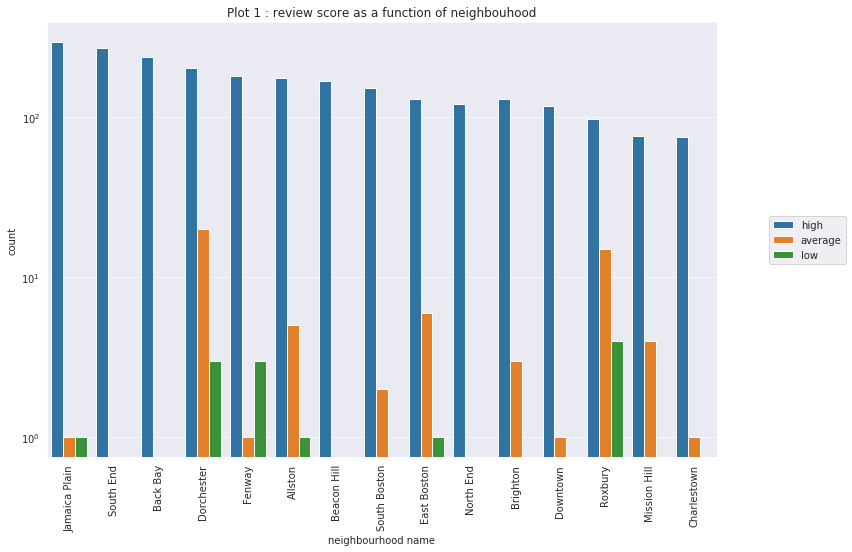

In [38]:
neighbourhood_list = ['Jamaica Plain', 'South End', 'Back Bay', 'Dorchester', 'Fenway','Allston', 'Beacon Hill',
                      'South Boston', 'East Boston', 'North End','Brighton', 'Downtown', 'Roxbury', 'Mission Hill',
                      'Charlestown']

plt.figure(figsize=(12,8))

sns.countplot(boston_location_df[boston_location_df['neighbourhood_cleansed'].isin(neighbourhood_list)]['neighbourhood_cleansed'], 
              hue=boston_location_df['review_groups_location'],
              order = neighbourhood_list)
plt.xlabel('neighbourhood name')
plt.xticks(rotation=90)
plt.title('Plot 1 : review score as a function of neighbouhood')
plt.yscale('log')
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5))

Although in most of the cases neighbouhoods with highest listings have high scores, some of them (e.g. 'Dorchester', 'Roxbury', 'Fenway') have non negligible amount of average or low scores. 

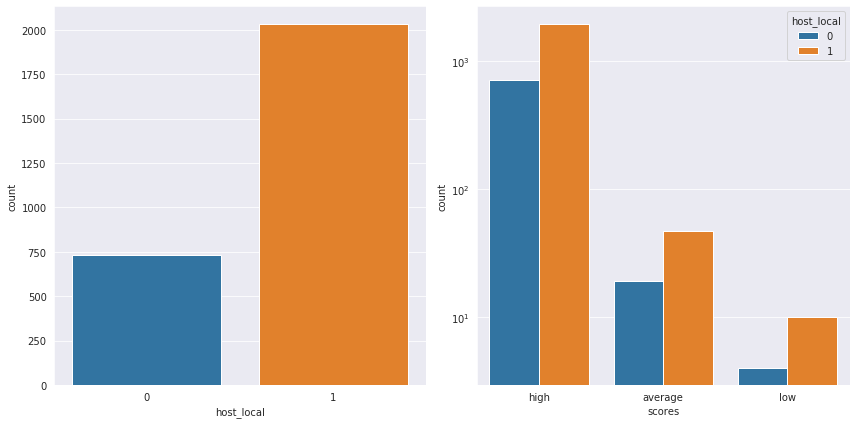

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot('host_local', data=boston_location_df, ax=ax[0])
sns.countplot('review_groups_location', hue='host_local', data=boston_location_df, ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('scores')
fig.tight_layout()

So **most of the hosts are local** (left plot). For both local and non-local hosts, 'high' score group dominates over others (right plot).

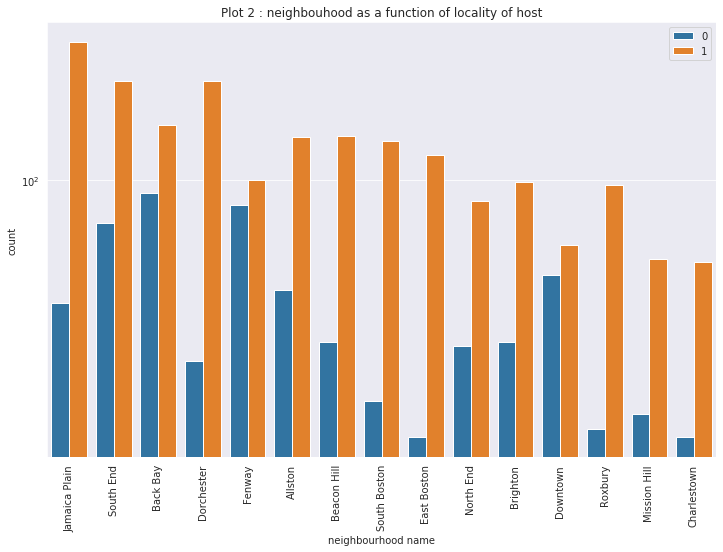

In [40]:
plt.figure(figsize=(12,8))

sns.countplot(boston_location_df[boston_location_df['neighbourhood_cleansed'].isin(neighbourhood_list)]['neighbourhood_cleansed'], 
              hue=boston_location_df['host_local'],order = neighbourhood_list)
plt.xlabel('neighbourhood name')
plt.xticks(rotation=90)
plt.title('Plot 2 : neighbouhood as a function of locality of host')
plt.yscale('log')
plt.legend(loc='best')

Some of the interesting points to note :

1. Although neighbourhoods like 'South End', 'Back Bay' have large number of non-local hosts, they have only high ratings (Plot 1).
2. 'Fenway' has a comparable number of local and non-local hosts but high score group dominates over the rest.

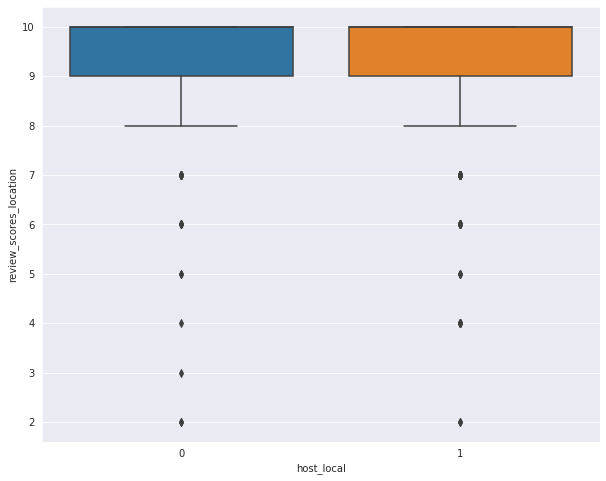

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='host_local', y='review_scores_location', data=boston_location_df)

Both the local and non-local hosts have nearly identical score distributions.

In [42]:
boston_location_df.columns

Index(['neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
       'latitude', 'longitude', 'is_location_exact', 'review_scores_location',
       'host_local', 'review_groups_location'],
      dtype='object')

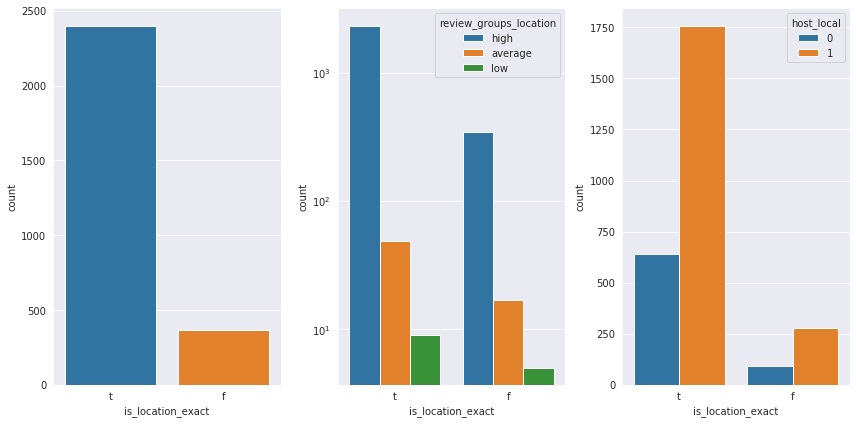

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))
sns.countplot('is_location_exact', data=boston_location_df, ax=ax[0])
sns.countplot('is_location_exact', hue='review_groups_location', data=boston_location_df, ax=ax[1])
sns.countplot('is_location_exact', hue='host_local', data=boston_location_df, ax=ax[2])
ax[1].set_yscale('log')
fig.tight_layout()

Total number of listings with exact location belonging to high score group is higher then listings with no exact location (left and middle plots). Also both local and non-local hosts have more number of listings with exact locations (right plot).

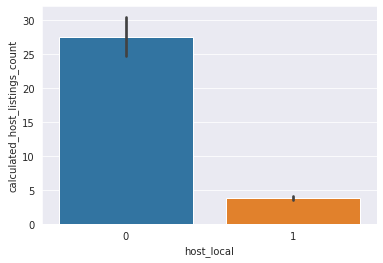

In [44]:
sns.barplot(x='host_local', y='calculated_host_listings_count', data=boston_location_df)

Non-local hosts have larger number of listings as compared to local hosts. Well that is not surprising! You are more likely to give your house on rent if you are living outside the city.

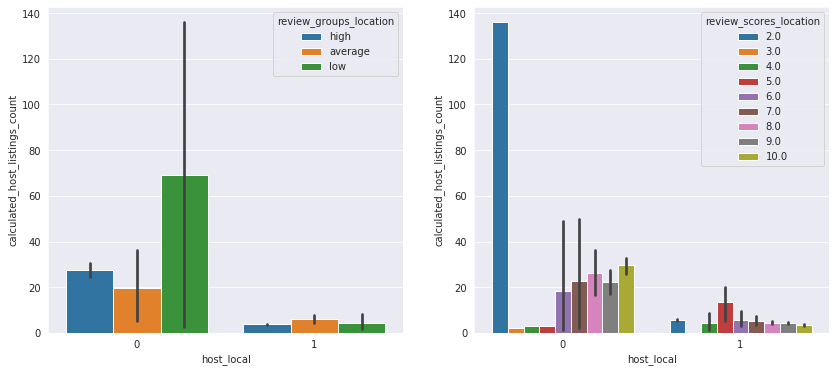

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='host_local', y='calculated_host_listings_count', hue='review_groups_location', data=boston_location_df, ax=ax[0])
sns.barplot(x='host_local', y='calculated_host_listings_count', hue='review_scores_location', data=boston_location_df, ax=ax[1])

From the above plots it is evident that non-local hosts have maximum of the listings with low scores whereas average score is more common in case of listings of the local hosts.

**Question 2** : What causes a property to cost more than others?

Let's start with the following features.

### Cleaning the data

In [46]:
boston_price_df = boston_df[['host_verifications', 'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'review_scores_rating', 'price']]

Let's first calculate percentage of NULL values in each feature.

In [47]:
boston_price_df.isnull().sum().sort_values()/len(boston_price_df)

host_verifications        0.000000
host_identity_verified    0.000000
room_type                 0.000000
accommodates              0.000000
bed_type                  0.000000
amenities                 0.000000
price                     0.000000
property_type             0.000837
beds                      0.002510
bedrooms                  0.002789
bathrooms                 0.003905
review_scores_rating      0.226778
square_feet               0.984379
dtype: float64

Except 'square_feet' which has almost 98% of it's value as NULL, rest of the features either have no or very few NULL values. The feature 'square_feet' is related indirectly to other features like 'bedrooms', 'bathrooms', 'accomodates' because larger the size of the property more rooms it is likely tohave and more guests it can accomodate. So let's just drop the column 'square_feet'.

In [48]:
boston_price_df.drop('square_feet', axis=1, inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
boston_price_df[['host_verifications', 'host_identity_verified']].head()

,host_verifications,host_identity_verified
0,"['email', 'phone', 'facebook', 'reviews']",f
1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t
2,"['email', 'phone', 'reviews', 'jumio']",t
3,"['email', 'phone', 'reviews']",f
4,"['email', 'phone', 'reviews', 'kba']",t


'host_verifications' contains several platforms on which the identity of a particular host can be verified whereas 'host_identity_verified' represents either the identity of a host has been verified or not. For a customer, the later feature is more important than the former one. Let's just drop the column 'host_verifications'.

In [50]:
boston_price_df.drop('host_verifications', axis=1, inplace=True)

Let's now find out which ones are categorical variables.

In [51]:
boston_price_df['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [52]:
boston_price_df['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [53]:
boston_price_df['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [54]:
for items in boston_price_df['amenities'].values[:5]:
    print(items)
    print('\n')

{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}


{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer",Iron}


{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",Essentials,Shampoo,"Lock on Bedroom Door","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}


{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,Breakfast,"Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Carbon M

In [55]:
boston_price_df['amenities'].nunique()

3092

So the feature 'amenities' basically enlists all the facilites provided to guests. It has 3092 unique values! It is nearly impossible to deal with so many different categories. Instead it might be useful to calculate how many amenities does a particular property offer to it's guests. Let's create a new column 'amenities_count' that gives total number of amenities provided in each listing and then drop the original one. But we first need to clean the data.

In [56]:
boston_price_df.dtypes

host_identity_verified     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
amenities                  object
review_scores_rating      float64
price                      object
dtype: object

Each of the entries in 'amenities' column is read as a single 'object' type and therefore we cannot apply the len() function directly on it. Note that individual elements inside this big object element are delimited by ",". So we can convert this single string object to a list of individuals items by splitting it on "," and then calculate the length of that list which basically gives you the total number of amenities available in each listing.

In [57]:
boston_price_df['amenities_count'] = boston_price_df['amenities'].apply(lambda x:len(x.split(",")))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
boston_price_df['amenities_count'].max(), boston_price_df['amenities_count'].min()

(31, 1)

So highest number of amenities offered is 31 whereas the lowest is 1. Now we can drop the 'amenities' column.

In [59]:
boston_price_df.drop('amenities', axis=1, inplace=True)

Our target column 'price' in this case is defined as 'object' type. Let's remove the '$' sign from the front, "," from the price (if any) and convert it to 'float' type.

In [60]:
boston_price_df['price'] = boston_price_df['price'].apply(lambda x : float(x.strip("$").replace(",", "")))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's just check that everythig is consistent.

In [61]:
boston_price_df.dtypes

host_identity_verified     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
review_scores_rating      float64
price                     float64
amenities_count             int64
dtype: object

### Visualisations

(0, 800)

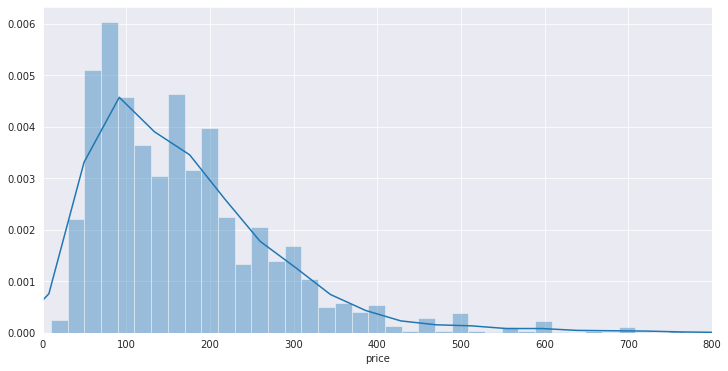

In [63]:
plt.figure(figsize=(12,6))
sns.distplot(boston_price_df['price'], bins=200)
plt.xlim(0,800)

Prices of listings in the Boston area has a wide range. However, the number of listings with very high price (e.g. greater than 400 (in some monetary unit)) rapidly decreases.

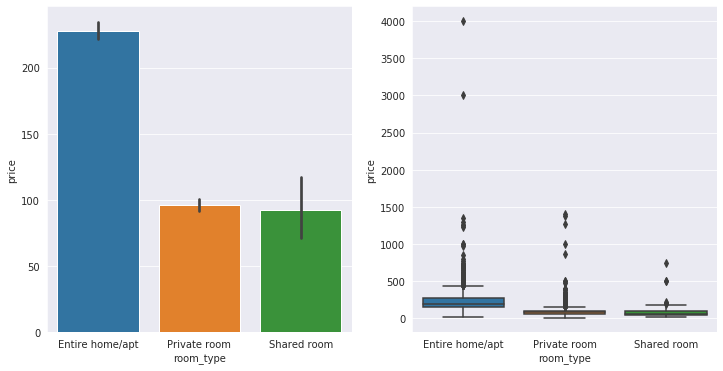

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(x='room_type', y='price', data=boston_price_df, ax=ax[0])
sns.boxplot(x='room_type', y='price', data=boston_price_df, ax=ax[1])

So entire home/apartment costs more than private and shared rooms (left plot). Private and shared rooms have comparable prices. Each of the categories have quite a few outliers (right plot).

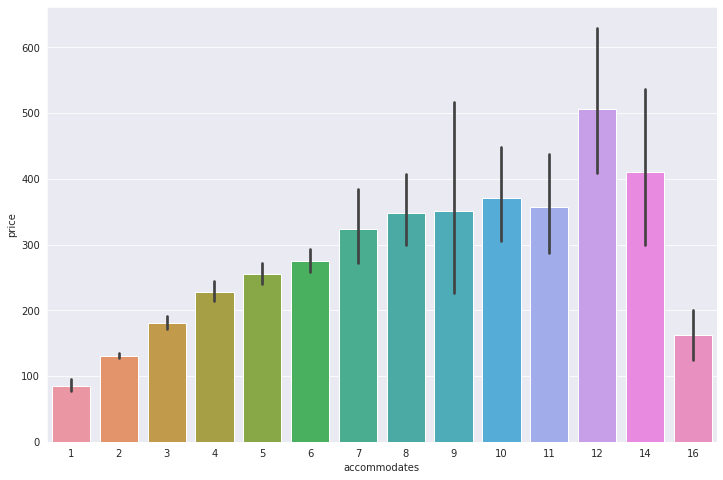

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x='accommodates', y='price', data=boston_price_df)

Prices gradually increases for an increasing value of accommodates. However after a certain value (here 12), it shows a downward trend.

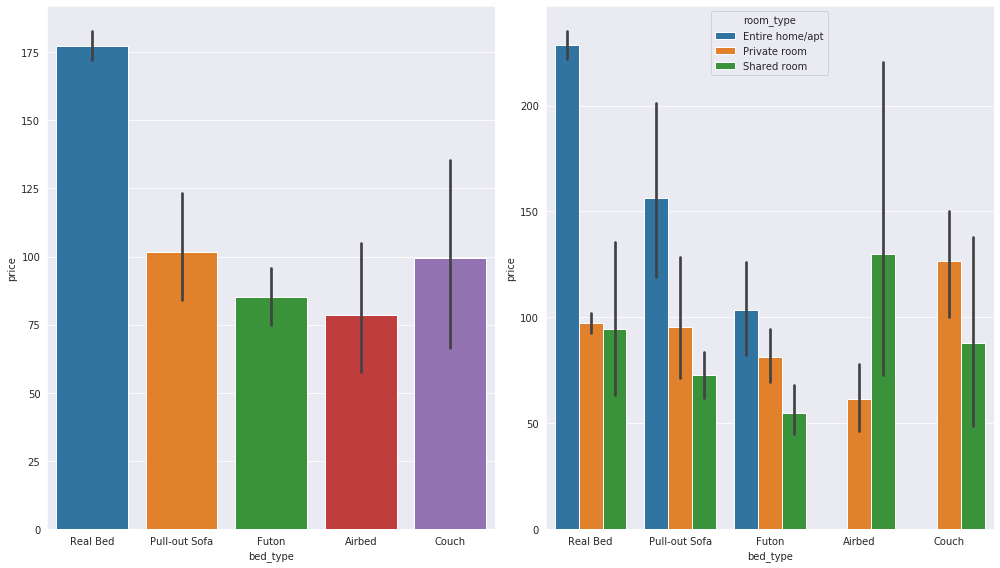

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
sns.barplot(x='bed_type', y='price', data=boston_price_df, ax=ax[0])
sns.barplot(x='bed_type', y='price', hue='room_type', data=boston_price_df, ax=ax[1])
fig.tight_layout()

Listings that come with 'real beds' costs the most whereas that with airbeds costs the lowest (left plot). Another interesting point is that, entire home or apartments donot come with options of airbeds and couches whereas shared rooms with airbeds and private rooms with couches are costlier (right plot). An entire home or apartment with real beds is the cosliest option.

In [67]:
boston_price_df['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

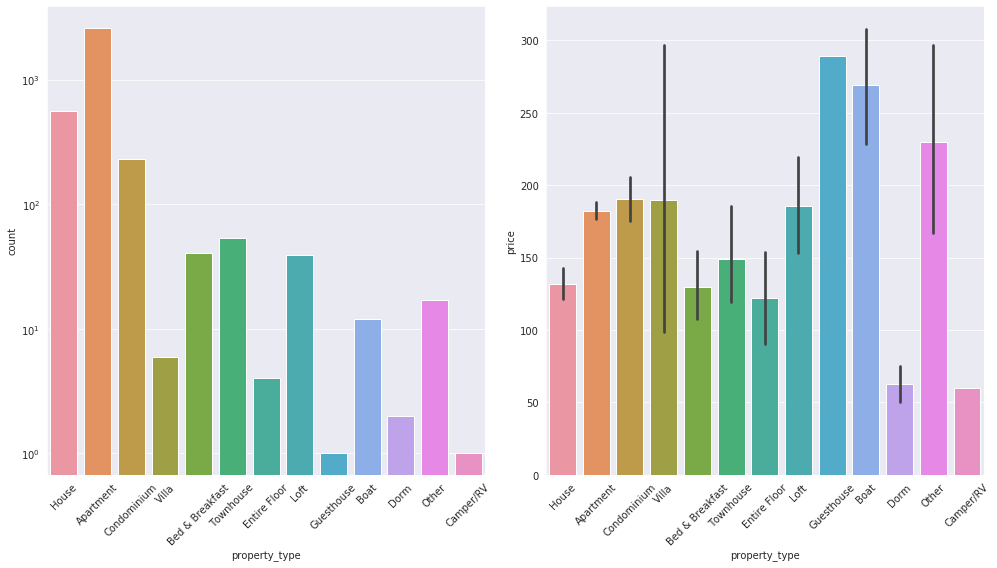

In [68]:
labels = ['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 'Camper/RV']

fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot(x='property_type', data=boston_price_df, ax=ax[0])
sns.barplot(x='property_type', y='price', data=boston_price_df, ax=ax[1])
ax[0].set_xticklabels(labels, rotation=45)
ax[1].set_xticklabels(labels, rotation=45)
ax[0].set_yscale('log')
fig.tight_layout()

Three property types have most number of listings - apartment, house and condominium (right plot). Although total number of listings for guetshouse type properties is the lowest, it has the highest price among all other available properties (left plot). Boats cost almost same as guesthouses. The cheapest properties are dorms and campers.

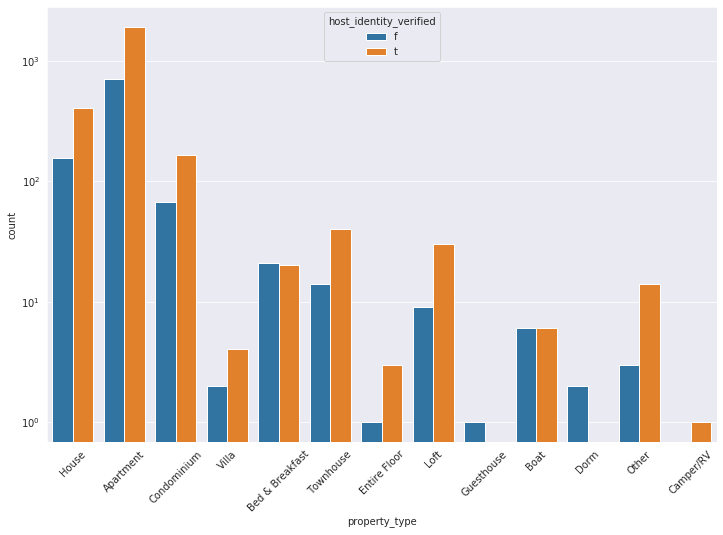

In [69]:
plt.figure(figsize=(12,8))
sns.countplot(x='property_type', hue='host_identity_verified', data=boston_price_df)
plt.xticks(rotation=45)
plt.yscale('log')

Almost all of the properties have comparable number of listings with host identity verified and not verified. The property with least number of listings and highest price that is guesthouses has none of it's host's identity verified and thus might not be reliable.

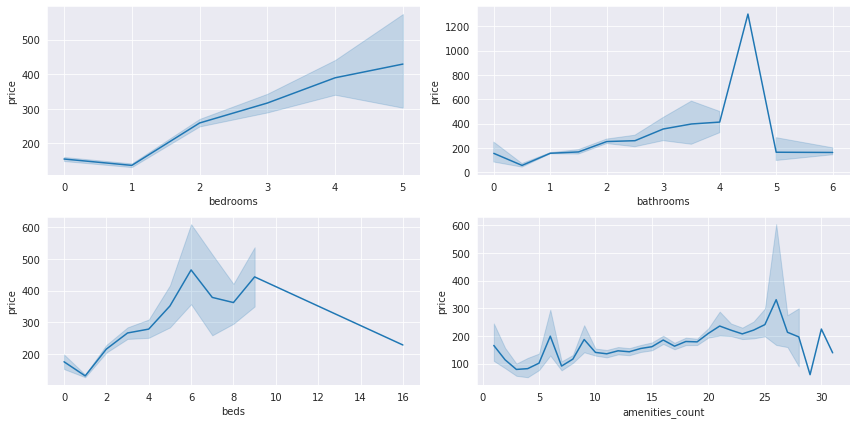

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.lineplot(x='bedrooms', y='price', data=boston_price_df, ax=ax[0,0])
sns.lineplot(x='bathrooms', y='price', data=boston_price_df, ax=ax[0,1])
sns.lineplot(x='beds', y='price', data=boston_price_df, ax=ax[1,0])
sns.lineplot(x='amenities_count', y='price', data=boston_price_df, ax=ax[1,1])
fig.tight_layout()

Listings with increasing number of bedrooms have an almost steady increase in their prices (upper left plot). Price is lower when 'beds' is around 16 as compared to listings with beds around 4-9 (lower left plot). Price shows very little variation as a function of 'bathrooms' and 'amenities_count' (upper and lower right plots). Note that, there is a sudden pick in the upper right plot. This most likely indicates presence of some outlier data points.

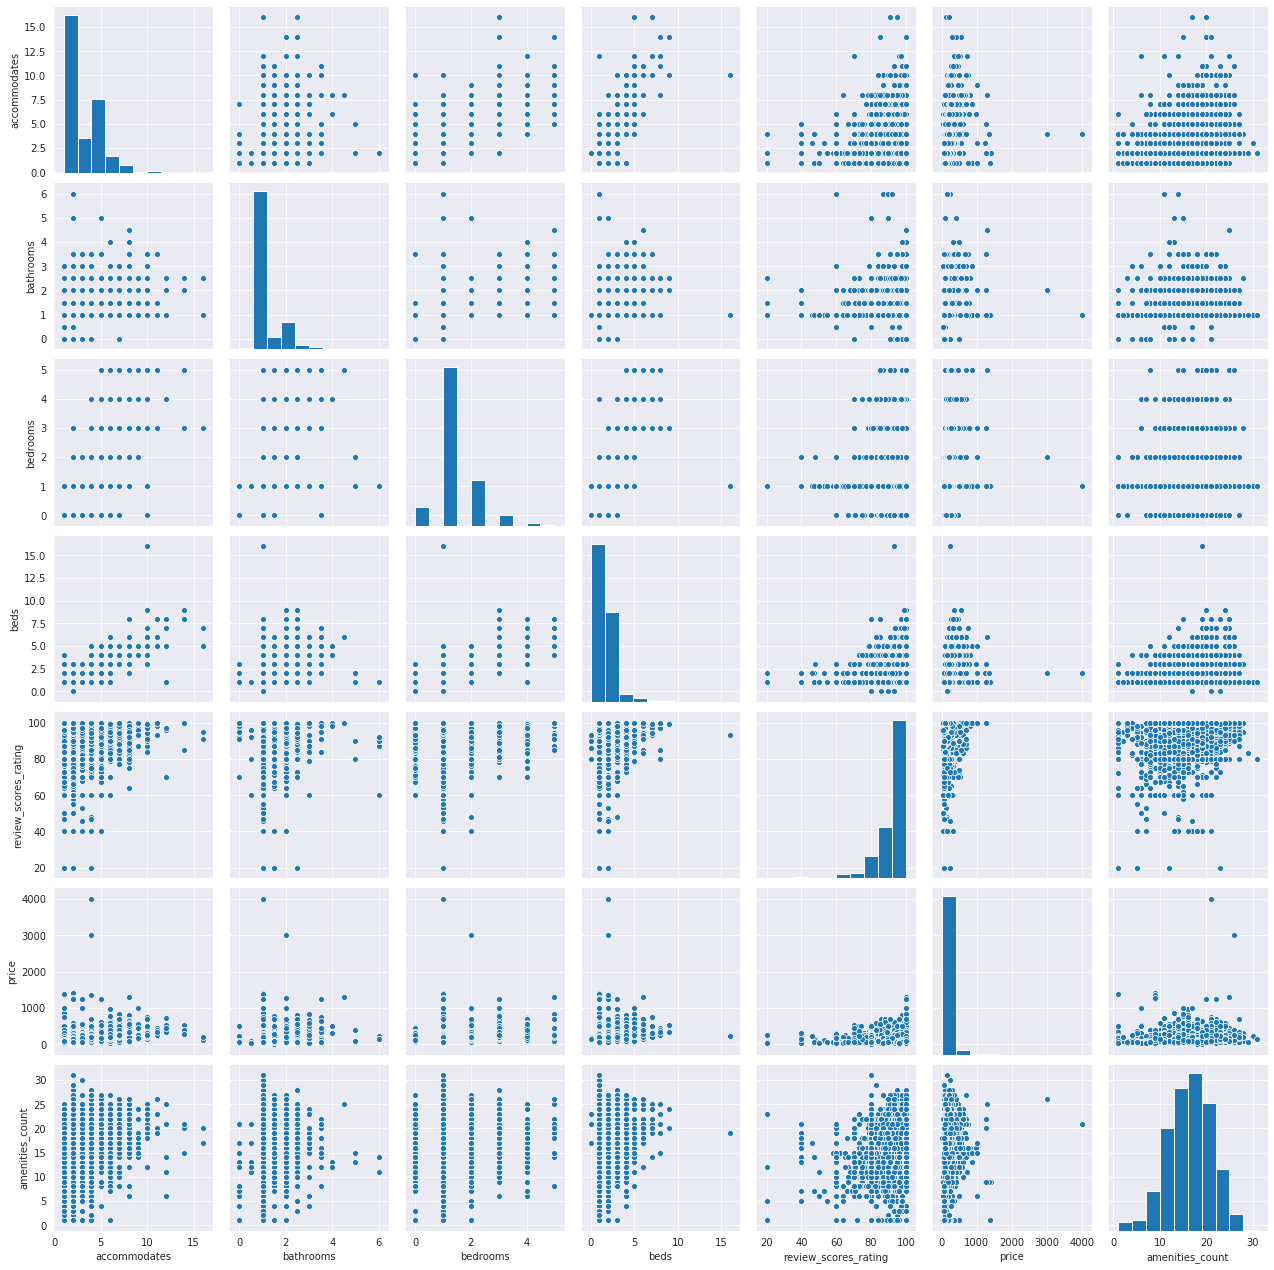

In [71]:
sns.pairplot(boston_price_df)

We note the following (we refer to a plot as plot(x,y) where x and y are coordinates of a particular plot along the x and y directions in the 7x7 grid plane):

- The more number of beds a listing provides, the more it can accommodate (plot(4,1)). Well this is not surprising!
- One can get a large number of amenties even with low listing prices (plot(6,7)).
- The price of a particular listing is independent of number of bedrooms and/or bathrooms it has (plot(6,2) and plot(6,3)).
- Listings with comparatively higher prices also have higher ratings (plot(6,5)).

These correlations can be best understood with the help of a heatmap.

In [72]:
boston_price_df.columns

Index(['host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'review_scores_rating',
       'price', 'amenities_count'],
      dtype='object')

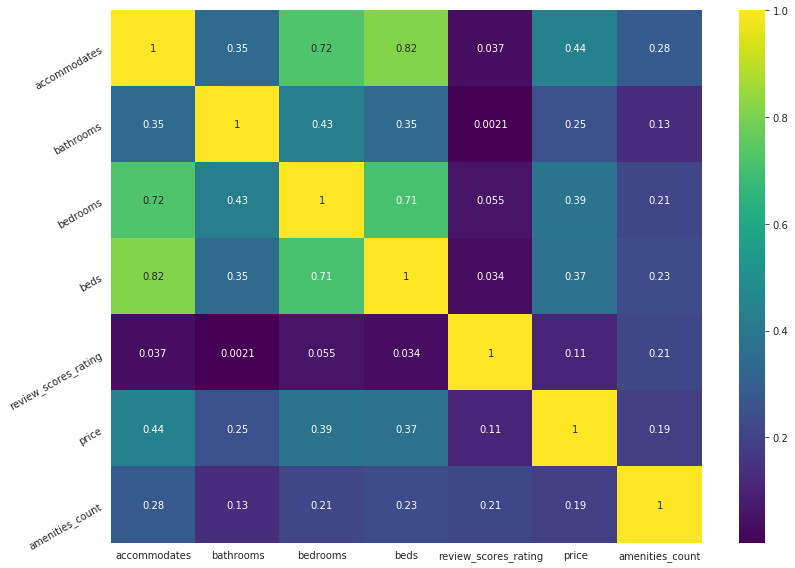

In [73]:
labels = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'price', 'amenities_count']

plt.figure(figsize=(12,8))
ax = sns.heatmap(boston_price_df.corr(), annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_yticklabels(labels, rotation=30)
plt.tight_layout()

The above heatmap shows correlations between different numerical features and price of a listing. Some of the highly correlated feature pairs are : 'accommodates'-'bedrooms', 'accommodates'-'beds', 'bedrooms'-'beds'. The feature that is seen to have more impact on price over others is 'accommodates'. That means larger is the size of the listing, more is the price. 

**Question 3** : Does background of a host have an impact on listings?

We start with the following features.

### Cleaning the data

In [74]:
boston_host_df = boston_df[['host_since', 'host_about', 'host_response_time', 'host_response_rate',
                            'host_acceptance_rate', 'host_is_superhost', 'calculated_host_listings_count', 
                            'host_has_profile_pic', 'host_identity_verified','number_of_reviews',
                            'review_scores_rating']]

Let's check first total number of NULL values present in the dataset.

In [75]:
boston_host_df.isnull().sum().sort_values()

host_since                           0
host_is_superhost                    0
calculated_host_listings_count       0
host_has_profile_pic                 0
host_identity_verified               0
number_of_reviews                    0
host_response_time                 471
host_response_rate                 471
host_acceptance_rate               471
review_scores_rating               813
host_about                        1309
dtype: int64

We start with the column with the most NULL values. 

In [76]:
for text in boston_host_df['host_about'].values[:5]:
    print(text)
    print('\n')

We are country and city connecting in our deck and garden. Enjoy our music room, books and flat screen TV with the pastoral backyard of hens, bees, rabbits and an organic garden.  


I live in Boston and I like to travel and have travelers staying at my place.


I am a middle-aged, single male with a wide range of interests and creative outlets.  I have traveled frequently, in much of the world, especially central Europe, including Hungary and Slovakia. In recent years I have had many trips to Mexico, where I buy folk art for my online business, called Viva Oaxaca Folk Art. I love meeting new people, especially travelers with stories to tell.  

In addition to the above, I run web sites for small companies, including a physical therapy practice, a cancer treatment center and a colonial era historic house and museum. 

In the 1980s, I was a publicist and concert producer, and have presented many concerts with Judy Collins, as well as with Ella Fitzgerald, Laura Nyro, Tom Rush, Barbara C

One can think of this feature as a tagline for a listing. Every tagline is very different from others. To turn it into a useful feature requires an enormous amount of feature engineering and hence we drop it. 

In [77]:
boston_host_df.drop('host_about', axis=1, inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
boston_host_df['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [79]:
boston_host_df['host_response_rate'].unique()

array([nan, '100%', '98%', '83%', '75%', '60%', '95%', '77%', '90%',
       '50%', '93%', '70%', '71%', '36%', '73%', '67%', '33%', '78%',
       '86%', '80%', '96%', '40%', '0%', '94%', '92%', '97%', '89%',
       '88%', '31%', '91%', '81%', '99%', '85%', '69%', '56%', '30%',
       '68%', '82%', '17%', '14%', '38%', '63%', '43%', '64%', '19%',
       '79%', '61%', '57%', '84%', '25%', '20%', '6%', '10%'],
      dtype=object)

The features 'host_response_time' and 'host_response_rate' are correlated. Hosts who responds promptly have high response rate and therefore we can work with one of them and drop the other one. Now 'host_response_rate' is more descriptive than 'host_response_time' in a sense that it covers a wide range of values and thus might give us a deeper insight into the data. So we will proceed with 'host_response_rate' and drop 'host_response_time'. However, note that the feature 'host_response_rate' needs some amount of data cleaning.

In [80]:
boston_host_df.drop('host_response_time', axis=1, inplace=True)

In [81]:
boston_host_df['host_response_rate'] = boston_host_df['host_response_rate'].apply(lambda x: float(str(x).strip("%"))/100.)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
boston_host_df['host_response_rate'].unique()

array([ nan, 1.  , 0.98, 0.83, 0.75, 0.6 , 0.95, 0.77, 0.9 , 0.5 , 0.93,
       0.7 , 0.71, 0.36, 0.73, 0.67, 0.33, 0.78, 0.86, 0.8 , 0.96, 0.4 ,
       0.  , 0.94, 0.92, 0.97, 0.89, 0.88, 0.31, 0.91, 0.81, 0.99, 0.85,
       0.69, 0.56, 0.3 , 0.68, 0.82, 0.17, 0.14, 0.38, 0.63, 0.43, 0.64,
       0.19, 0.79, 0.61, 0.57, 0.84, 0.25, 0.2 , 0.06, 0.1 ])

In [83]:
boston_host_df['host_acceptance_rate'].unique()

array([nan, '100%', '88%', '50%', '95%', '96%', '89%', '97%', '79%',
       '94%', '63%', '92%', '71%', '83%', '91%', '67%', '73%', '85%',
       '93%', '60%', '25%', '75%', '56%', '0%', '76%', '57%', '74%',
       '82%', '62%', '90%', '69%', '77%', '33%', '58%', '78%', '81%',
       '17%', '86%', '20%', '70%', '80%', '72%', '98%', '45%', '55%',
       '68%', '42%', '30%', '99%', '36%', '84%', '19%', '61%', '29%',
       '87%', '66%', '54%', '65%', '64%', '51%', '43%', '23%', '40%',
       '48%', '47%', '52%', '28%', '18%', '46%', '59%', '44%', '38%',
       '53%'], dtype=object)

In [84]:
boston_host_df['host_acceptance_rate'] = boston_host_df['host_acceptance_rate'].apply(lambda x: float(str(x).strip("%"))/100.)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
boston_host_df['host_acceptance_rate'].unique()

array([ nan, 1.  , 0.88, 0.5 , 0.95, 0.96, 0.89, 0.97, 0.79, 0.94, 0.63,
       0.92, 0.71, 0.83, 0.91, 0.67, 0.73, 0.85, 0.93, 0.6 , 0.25, 0.75,
       0.56, 0.  , 0.76, 0.57, 0.74, 0.82, 0.62, 0.9 , 0.69, 0.77, 0.33,
       0.58, 0.78, 0.81, 0.17, 0.86, 0.2 , 0.7 , 0.8 , 0.72, 0.98, 0.45,
       0.55, 0.68, 0.42, 0.3 , 0.99, 0.36, 0.84, 0.19, 0.61, 0.29, 0.87,
       0.66, 0.54, 0.65, 0.64, 0.51, 0.43, 0.23, 0.4 , 0.48, 0.47, 0.52,
       0.28, 0.18, 0.46, 0.59, 0.44, 0.38, 0.53])

In [86]:
boston_host_df['host_is_superhost'].value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [87]:
boston_host_df['host_has_profile_pic'].value_counts()

t    3577
f       8
Name: host_has_profile_pic, dtype: int64

Note that almost all the hosts have a profile picture with an exception of only 8. Therefore this feature is largely biased towards the case with profile picture and is not useful for us. Let's drop it.

In [88]:
boston_host_df.drop('host_has_profile_pic', axis=1, inplace=True)

In [89]:
boston_host_df.dtypes

host_since                         object
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                  object
calculated_host_listings_count      int64
host_identity_verified             object
number_of_reviews                   int64
review_scores_rating              float64
dtype: object

We can use the feature 'host_since' to calculate total years of experience of a host. To do that, we first need to convert this feature from 'object' type to 'datetime' type.

In [90]:
boston_host_df['host_since'] = pd.to_datetime(boston_host_df['host_since'])

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
boston_host_df.dtypes

host_since                        datetime64[ns]
host_response_rate                       float64
host_acceptance_rate                     float64
host_is_superhost                         object
calculated_host_listings_count             int64
host_identity_verified                    object
number_of_reviews                          int64
review_scores_rating                     float64
dtype: object

Now we can only extract out the year from each entry in this column and use it to calculate the total years of experience. Let's create a new feature called **total_experiences** and drop the original one.

In [92]:
import datetime

boston_host_df['total_experiences'] = boston_host_df['host_since'].apply(lambda x:(datetime.datetime.now().year - x.year))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
boston_host_df['total_experiences']

0        5
1        8
2       11
3        7
4        6
        ..
3580     6
3581     5
3582     6
3583     4
3584     5
Name: total_experiences, Length: 3585, dtype: int64

In [94]:
boston_host_df.drop('host_since', axis=1, inplace=True)

In [95]:
boston_host_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'calculated_host_listings_count', 'host_identity_verified',
       'number_of_reviews', 'review_scores_rating', 'total_experiences'],
      dtype='object')

In [96]:
boston_host_df['review_scores_rating'].min(), boston_host_df['review_scores_rating'].max()

(20.0, 100.0)

### Visualisations 

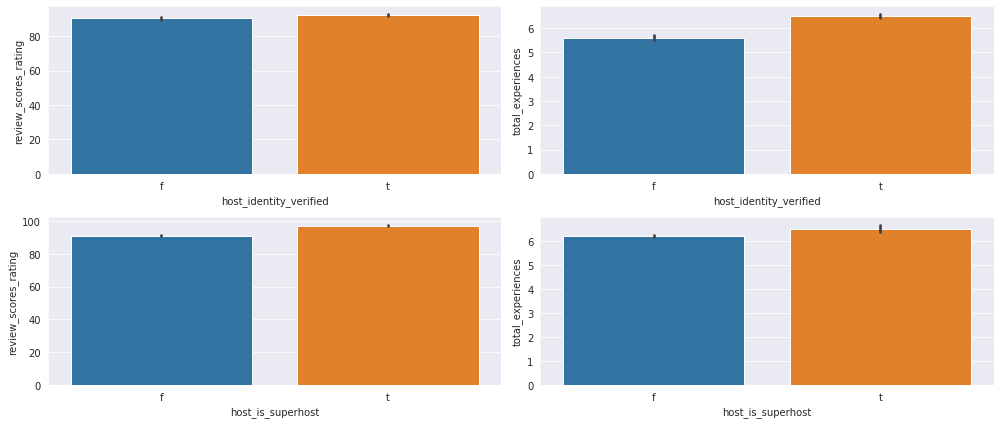

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(14,6))
sns.barplot(x='host_identity_verified', y='review_scores_rating', data=boston_host_df, ax=ax[0,0])
sns.barplot(x='host_identity_verified', y='total_experiences', data=boston_host_df, ax=ax[0,1])
sns.barplot(x='host_is_superhost', y='review_scores_rating', data=boston_host_df, ax=ax[1,0])
sns.barplot(x='host_is_superhost', y='total_experiences', data=boston_host_df, ax=ax[1,1])
fig.tight_layout()

Few interesting observations are :

- both the features 'host_identity_verified' and 'host_is_superhost' have similar kinds of distributions and hence can be used interchangably rather than separately (lower panel).
- review ratings and total years of experiences are almost independent of whether the identity of a host is verified or not (upper panel). 

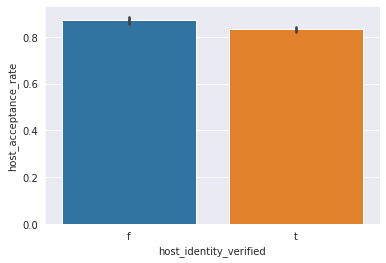

In [98]:
sns.barplot(x='host_identity_verified', y='host_acceptance_rate', data=boston_host_df)

Again, acceptance rate of a host is independent of the identity verification.

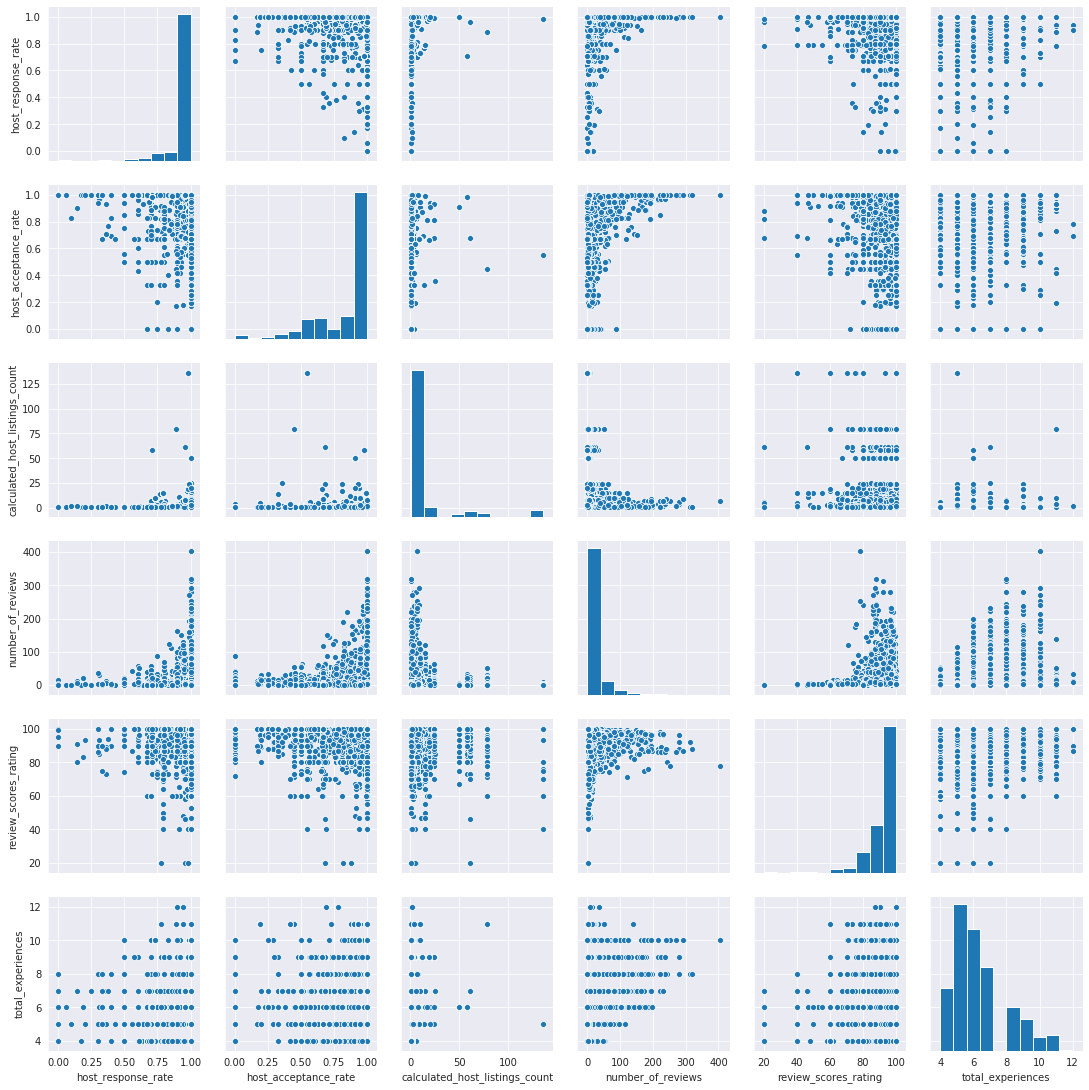

In [99]:
sns.pairplot(boston_host_df)

Few things to observe (we denote a plot as plot(x,y) where x and y are coordinates of a particular plot along the x and y directions in the 6x6 grid plane):

- Hosts with high response rate tend to have high acceptance rate. That means hosts who respond quickly are more popular among customers (plot(1,2)).
- Hosts with high response rate generally have high ratings (plot(1,5)).
- Similarly hosts with high acceptance rate also have high ratings (plot(2,5)).
- Listings with high ratings come with high number of reviews (plot(4,5)).
- Interesting point is that experience of a host has no effect on the rating (plot(6,5)).

**Question 4** : What roles do booking policies play?

Let's consider the following features.

### Cleaning the data

In [100]:
boston_policy_df = boston_df[['security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
                              'minimum_nights', 'requires_license', 'instant_bookable', 'cancellation_policy',
                              'require_guest_profile_picture', 'require_guest_phone_verification',
                              'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness',
                              'price']]

In [101]:
np.round(boston_policy_df.isnull().sum()/len(boston_policy_df), 4).sort_values()

guests_included                     0.0000
extra_people                        0.0000
minimum_nights                      0.0000
requires_license                    0.0000
instant_bookable                    0.0000
cancellation_policy                 0.0000
require_guest_profile_picture       0.0000
require_guest_phone_verification    0.0000
number_of_reviews                   0.0000
price                               0.0000
review_scores_rating                0.2268
review_scores_cleanliness           0.2282
cleaning_fee                        0.3088
security_deposit                    0.6257
dtype: float64

So the feature 'secuirity_deposit' has maximum percentage of NULL values ~ 63%.

In [102]:
boston_policy_df['requires_license'].value_counts()

f    3585
Name: requires_license, dtype: int64

None of the listings requires license and we can drop this feature.

In [103]:
boston_policy_df.drop('requires_license', axis=1, inplace=True)

In [104]:
boston_policy_df['extra_people'].unique()

array(['$0.00', '$20.00', '$25.00', '$15.00', '$10.00', '$30.00',
       '$35.00', '$100.00', '$5.00', '$33.00', '$50.00', '$39.00',
       '$12.00', '$7.00', '$40.00', '$36.00', '$9.00', '$34.00', '$45.00',
       '$19.00', '$22.00', '$60.00', '$59.00', '$49.00', '$18.00',
       '$120.00', '$17.00', '$62.00', '$150.00', '$37.00', '$200.00',
       '$80.00', '$44.00', '$8.00', '$42.00', '$70.00', '$65.00',
       '$77.00', '$69.00', '$27.00', '$75.00', '$29.00', '$16.00',
       '$58.00', '$125.00', '$89.00', '$6.00', '$85.00', '$55.00',
       '$88.00', '$24.00'], dtype=object)

The feature 'extra_people' basically tells us how much would you have to pay if you have additional accompanying persons. We need to clean the data in order to use it.

In [105]:
boston_policy_df['extra_people'] = boston_policy_df['extra_people'].apply(lambda x:float(x.strip("$")))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
boston_policy_df['extra_people'].unique()

array([  0.,  20.,  25.,  15.,  10.,  30.,  35., 100.,   5.,  33.,  50.,
        39.,  12.,   7.,  40.,  36.,   9.,  34.,  45.,  19.,  22.,  60.,
        59.,  49.,  18., 120.,  17.,  62., 150.,  37., 200.,  80.,  44.,
         8.,  42.,  70.,  65.,  77.,  69.,  27.,  75.,  29.,  16.,  58.,
       125.,  89.,   6.,  85.,  55.,  88.,  24.])

Which ones are the categorical features?

In [107]:
boston_policy_df['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [108]:
boston_policy_df['instant_bookable'].value_counts()

f    2991
t     594
Name: instant_bookable, dtype: int64

In [109]:
boston_policy_df['require_guest_profile_picture'].value_counts()

f    3518
t      67
Name: require_guest_profile_picture, dtype: int64

In [110]:
boston_policy_df['require_guest_phone_verification'].value_counts()

f    3348
t     237
Name: require_guest_phone_verification, dtype: int64

Features 'cancellation_policy', 'instant_bookable', 'require_guest_profile_picture' and 'require_guest_phone_verification' are categorical variables.

In [111]:
boston_policy_df['cleaning_fee'].unique()

array(['$35.00', '$10.00', nan, '$50.00', '$15.00', '$30.00', '$40.00',
       '$150.00', '$20.00', '$100.00', '$85.00', '$25.00', '$56.00',
       '$45.00', '$125.00', '$80.00', '$5.00', '$120.00', '$18.00',
       '$90.00', '$200.00', '$140.00', '$95.00', '$60.00', '$75.00',
       '$7.00', '$64.00', '$12.00', '$135.00', '$250.00', '$70.00',
       '$9.00', '$8.00', '$55.00', '$175.00', '$65.00', '$69.00',
       '$130.00', '$6.00', '$84.00', '$13.00', '$29.00', '$160.00',
       '$49.00', '$119.00', '$197.00', '$155.00', '$158.00', '$166.00',
       '$199.00', '$99.00', '$225.00', '$39.00', '$54.00', '$24.00',
       '$110.00', '$136.00', '$115.00', '$83.00', '$42.00', '$139.00',
       '$79.00', '$37.00', '$28.00', '$82.00', '$19.00', '$57.00',
       '$72.00', '$58.00', '$66.00', '$180.00', '$300.00', '$14.00',
       '$129.00', '$105.00', '$149.00', '$52.00', '$34.00', '$59.00',
       '$230.00'], dtype=object)

In [112]:
boston_policy_df['security_deposit'].unique()

array([nan, '$95.00', '$100.00', '$200.00', '$500.00', '$150.00',
       '$250.00', '$446.00', '$223.00', '$300.00', '$400.00', '$800.00',
       '$298.00', '$450.00', '$650.00', '$2,000.00', '$240.00',
       '$1,000.00', '$350.00', '$1,500.00', '$4,500.00', '$600.00',
       '$301.00', '$2,500.00', '$99.00', '$275.00', '$375.00', '$199.00',
       '$1,200.00', '$180.00', '$220.00', '$160.00', '$299.00', '$750.00',
       '$325.00', '$1,250.00', '$125.00', '$900.00', '$475.00',
       '$4,000.00', '$185.00', '$3,000.00', '$330.00', '$147.00',
       '$425.00', '$399.00', '$120.00', '$307.00', '$1,900.00', '$950.00',
       '$175.00', '$179.00', '$128.00', '$700.00', '$118.00'],
      dtype=object)

Both the features 'cleaning_fee' and 'security_deposit' need to be cleaned.

In [113]:
boston_policy_df['cleaning_fee'] = boston_policy_df['cleaning_fee'].apply(lambda x:float(str(x).strip("$")))
boston_policy_df['security_deposit'] = boston_policy_df['security_deposit'].apply(lambda x: float(str(x).strip("$").replace(",","")))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
boston_policy_df['price'] = boston_policy_df['price'].apply(lambda x : float(x.strip("$").replace(",", "")))

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
boston_policy_df['guests_included'].unique()

array([ 1,  0,  2,  4,  5,  3,  6,  9,  8, 12,  7, 14, 10])

In [116]:
boston_policy_df['minimum_nights'].unique()

array([  2,   3,   1,   4,   5,  14, 300,   7,   6,  30,  28,  21,  10,
        20,  15,  32,  27,  60,  90,  13,   8, 200,   9,  25,  11,  23,
        18,  17, 273])

Rest of the features are all continuos features.

In [117]:
boston_policy_df.columns

Index(['security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'price'],
      dtype='object')

### Visualisations 

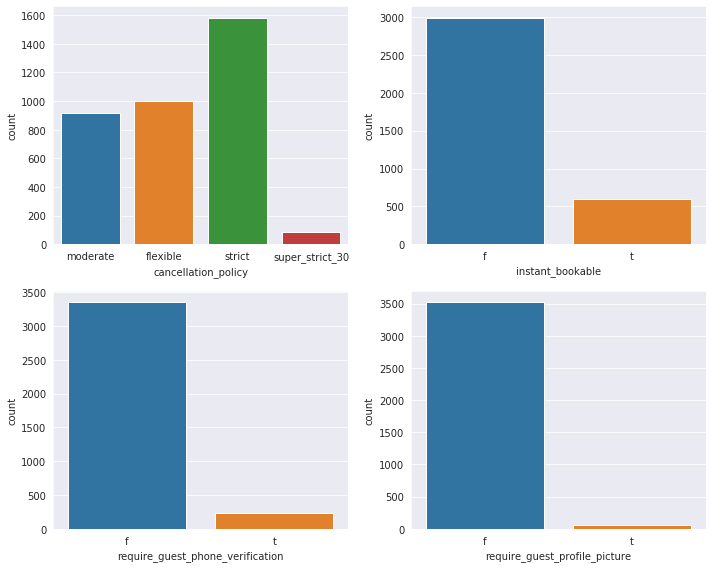

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.countplot('cancellation_policy', data=boston_policy_df, ax=ax[0,0])
sns.countplot('instant_bookable', data=boston_policy_df, ax=ax[0,1])
sns.countplot('require_guest_phone_verification', data=boston_policy_df, ax=ax[1,0])
sns.countplot('require_guest_profile_picture', data=boston_policy_df, ax=ax[1,1])
fig.tight_layout()

Key points to observe :

- Most of the listings have strict cancellation policies whereas very few have super strict cancellation policies.
- Most of the listings are not instantly bookable and donot require either guest's profile picture or phone number verified.

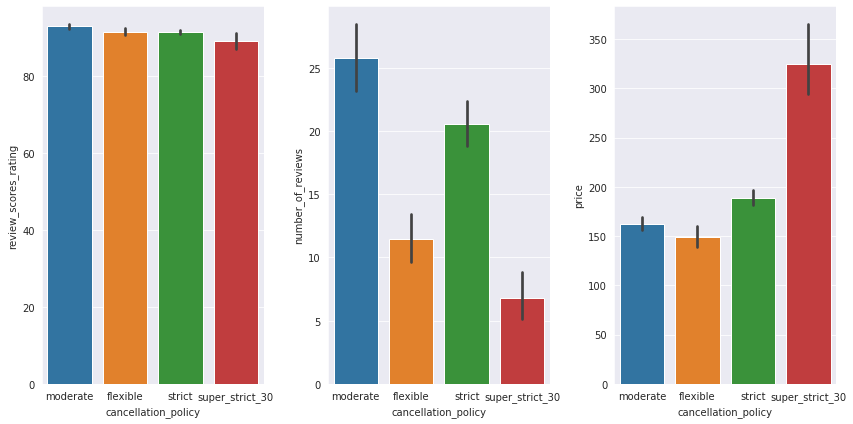

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

sns.barplot(x='cancellation_policy', y='review_scores_rating', data=boston_policy_df, ax=ax[0])
sns.barplot(x='cancellation_policy', y='number_of_reviews', data=boston_policy_df, ax=ax[1])
sns.barplot(x='cancellation_policy', y='price', data=boston_policy_df, ax=ax[2])
fig.tight_layout()

Observations are as follows:

- Average ratings are almost comparable for all categories in the cancellation_policy class (left plot).
- Most of the review are for listings with moderate and strict cancellation policy (middle plot).
- The price of a listing is the most for super strict cancellation policy (right plot).

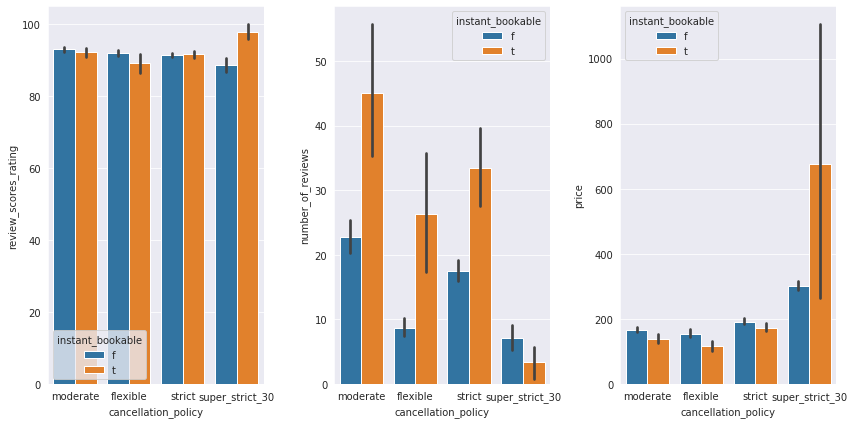

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

sns.barplot(x='cancellation_policy', y='review_scores_rating', hue='instant_bookable', data=boston_policy_df, ax=ax[0])
sns.barplot(x='cancellation_policy', y='number_of_reviews', hue='instant_bookable', data=boston_policy_df, ax=ax[1])
sns.barplot(x='cancellation_policy', y='price', hue='instant_bookable', data=boston_policy_df, ax=ax[2])
fig.tight_layout()

We conclude 

- Although instant bookability of a listing doesnot affect it's rating much, the listing with instant bookability tends to have larger reviews as compared to those with no instant bookability option.
- Listings with super strict cancellation policies and instant bookability have the highest prices.

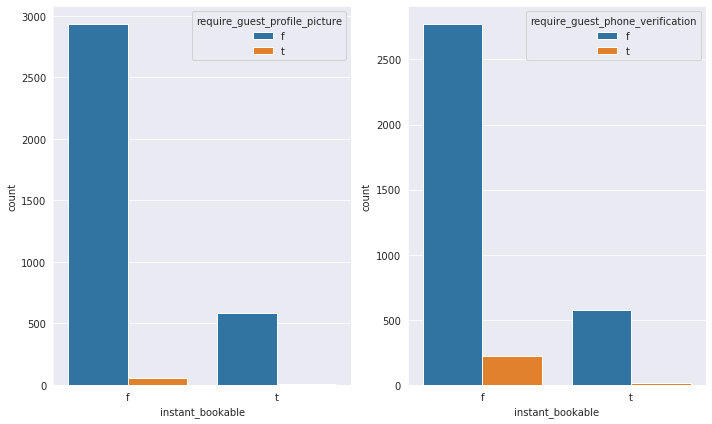

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.countplot(x='instant_bookable', hue='require_guest_profile_picture', data=boston_policy_df, ax=ax[0])
sns.countplot(x='instant_bookable', hue='require_guest_phone_verification', data=boston_policy_df, ax=ax[1])
fig.tight_layout()

The key observation is as follows :

- Listings with instant bookability donot require either guest's profile picture or phone number verified in almost all the cases.
- Very few listings with no instant bookability option require guest's profile picture and/or phone number verified.

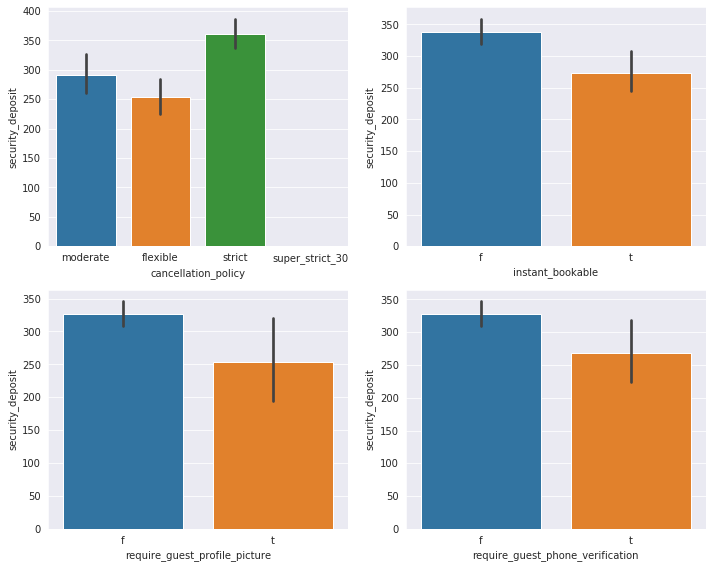

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.barplot(x='cancellation_policy', y='security_deposit', data=boston_policy_df, ax=ax[0,0])
sns.barplot(x='instant_bookable', y='security_deposit', data=boston_policy_df, ax=ax[0,1])
sns.barplot(x='require_guest_profile_picture', y='security_deposit', data=boston_policy_df, ax=ax[1,0])
sns.barplot(x='require_guest_phone_verification', y='security_deposit', data=boston_policy_df, ax=ax[1,1])
fig.tight_layout()

Some key observations from the above plots are 

- Listings with strict cancellation policy have higher security deposits whereas that with super strict policies donot require any security deposit at all.
- Listings with higher security deposits generally tend to have
    - no instant bookability
    - no guest profile picture
    - no phone verification of guests

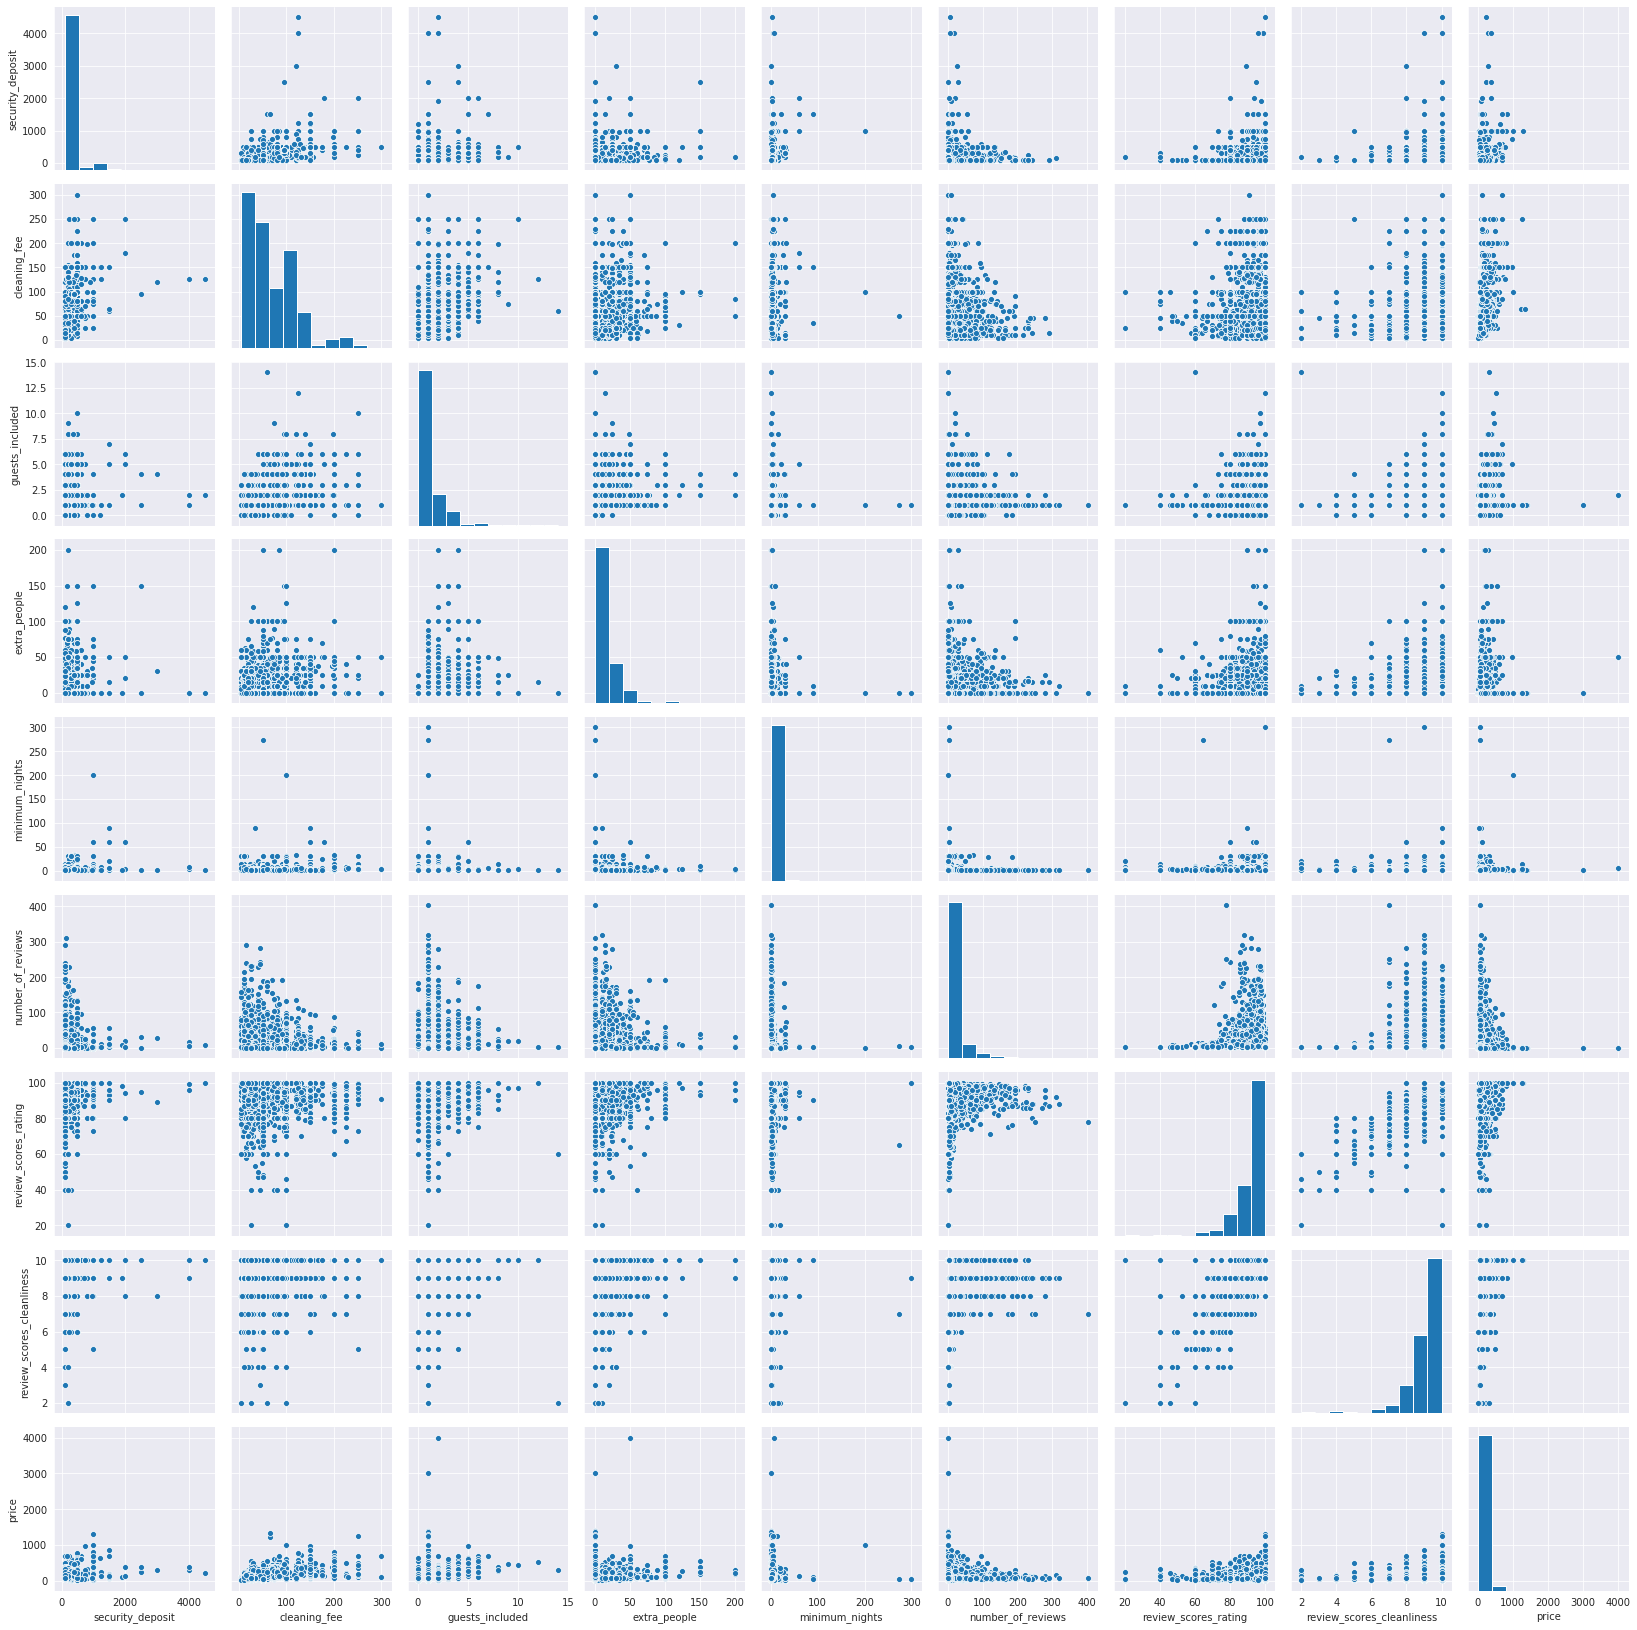

In [123]:
sns.pairplot(boston_policy_df)

As is clear from the above scatter plots, no two features are highly correlated. However, we can observe few trends as follows (we will denote a plot as plot(x,y) where x and y are coordinates of a particular plot along the x and y directions in the 9x9 grid plane)

- Listings with lower number of minimum nights required at the time of booking have higher security deposits (plot(1,5)).
- Most of the listings with lower security deposits have higher number of reviews (plot(1,6)) and also higher ratings (plot(1,7)).
- Lower booking price doesnot always mean lower security deposit (plot(1,9)).
- Listings with higher number of reviews also have higher ratings (plot(6,7)).

**Question 5** : Is there any difference between ratings of older and newer listings? That is in other words, is an old listing more trusted than comparatively newer ones? Do they differ in price?

Let's start with the features 'first_review' and 'last_review' which represent dates of the first and latest reviews that a particular listing has got.

In [124]:
boston_df[['first_review', 'last_review']].dtypes

first_review    object
last_review     object
dtype: object

The first thing that we observe is that these two columns have dtype 'object'. So we need to convert them to 'datetime' type.

In [125]:
boston_df['first_review'] = pd.to_datetime(boston_df['first_review'])

In [126]:
boston_df['last_review'] = pd.to_datetime(boston_df['last_review'])

In [127]:
boston_df[['first_review', 'last_review']].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

In [128]:
boston_df[['first_review', 'last_review']].isnull().sum()

first_review    756
last_review     756
dtype: int64

We can combine these two features to construct a new feature which will represent how old a particular listing is. In other words the earlier a listing has got it's first review, the more older it is likely to be compared to a listing which has got it's first review recently. We will call this new feature '**listing_duration**'which is basically total number of days between 'first_review' and 'last_review' of a listing.

In [129]:
boston_df['listing_duration'] = boston_df.apply(lambda x: abs((x['first_review']-x['last_review']).days) 
                                               if((pd.notnull(x['first_review'])) and (pd.notnull(x['last_review'])))
                                               else np.nan, axis=1)

In [130]:
boston_df['listing_duration']

0          NaN
1        804.0
2       2574.0
3          0.0
4        380.0
         ...  
3580     344.0
3581       NaN
3582       NaN
3583       8.0
3584       NaN
Name: listing_duration, Length: 3585, dtype: float64

To use the feature 'price' let's clean it as we did before.

In [131]:
boston_df['price'] = boston_df['price'].apply(lambda x:float(x.strip("$").replace(",", "")))

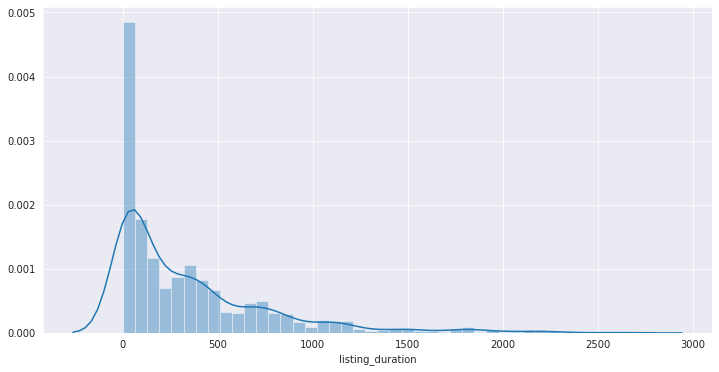

In [132]:
plt.figure(figsize=(12,6))
sns.distplot(boston_df['listing_duration'])

It is evident from the above plot that most of the listings are comparatively newer (less than two years old).

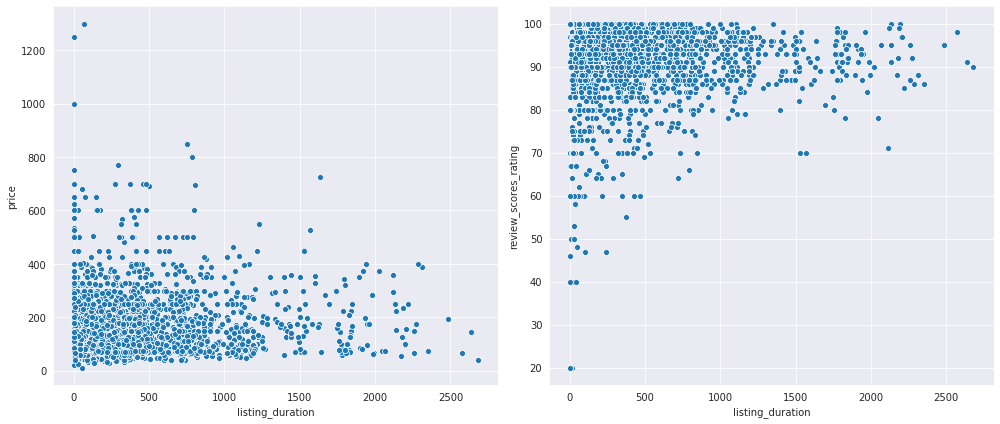

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(x='listing_duration', y='price', data=boston_df, ax=ax[0])
sns.scatterplot(x='listing_duration', y='review_scores_rating', data=boston_df, ax=ax[1])
fig.tight_layout()

We observe the following :

- Comparatively newer listings have a wider range of price where older ones tend to have low to medium range of prices (left plot).
- Older listings generally have higher ratings whereas there are some new listings with poor ratings (right plot).

Note that, the statistics corresponding to old listings are much lower. This is because, as we have seen, most of the listings in Boston are are new.

Another interesting point to check could be whether comparatively older listings belong to local hosts. You can think of it from the following point of view - if Airbnb listings get popularity in the Boston area, people from outside with a property in the city might want to invest through Airbnb. 

In [134]:
boston_df['host_local'] = boston_df['host_location'].apply(lambda x: 1 if 'boston' in str(x).lower() else 0)

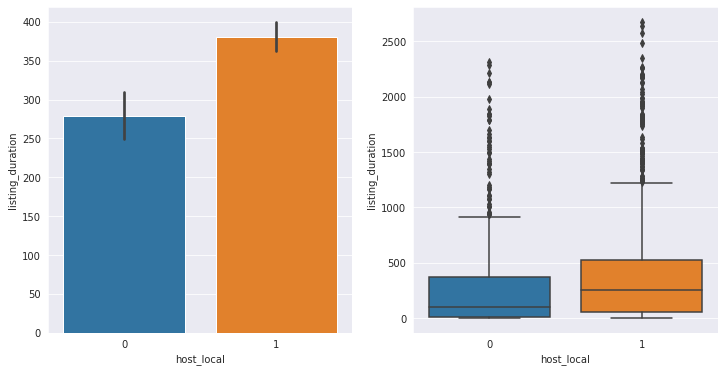

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(x='host_local', y='listing_duration', data=boston_df, ax=ax[0])
sns.boxplot(x='host_local', y='listing_duration', data=boston_df, ax=ax[1])

We observe that although older listings primarily belong to local hosts, some recent listings have also come from non-local hosts. That might indicate towards the popularity of Airbnb listing in the boston area.